# 🎬 Movie Insights & Recommendation Portfolio Project

**Author:** Arunkumar 
**Date:** June 2025

---

## Project Overview

This project explores a movie dataset (from Letterboxd) to demonstrate real-world data science and machine learning skills:
- **Exploratory Data Analysis (EDA):** Uncover patterns in movie popularity, genres, and ratings.
- **Content-Based Recommendation System:** Suggest similar movies using TF-IDF and cosine similarity.
- **Genre Prediction (ML):** Predict a movie's genre from its plot using supervised machine learning.

This notebook is intended for my data science portfolio and demonstrates practical EDA, NLP, and classification modeling.

---


# Movie Dataset Exploratory Data Analysis  
# Recommendation System through Machine Learning Techniques
**Role:** Data Analyst & Machine Learning Practitioner

We answer the following questions:
- What are the most and least rated movies?
- What are the most common genres?
- What does the movie rating distribution look like?
- Are there any interesting patterns in genres, languages, or other variables?
- **How can we use machine learning to recommend movies based on your favorites?**



## 📊 Exploratory Data Analysis (EDA)

Understanding the dataset: find top movies, most common genres, rating distributions, and key trends.


## Introduction

This dataset contains movies from Letterboxd with information such as titles, genres, ratings, and more.  
Our goal here is to perform exploratory data analysis (EDA) to understand rating trends, genre popularity, and key characteristics of the movies in the dataset.


## Data Loading & Overview

Let's load the data, check its dimensions, preview the first few rows, and look for missing values or oddities.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all plots
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

movies = pd.read_csv('Letterbox Movie Classification Dataset.csv')

print(f"Dataset shape: {movies.shape}")
display(movies.head())


Dataset shape: (10000, 17)


,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721


In [60]:
# Check for missing values and show summary statistics
#print("Missing values per column:")
#print(movies.isnull().sum())
#display(movies.describe(include='all'))


### Genre Cleaning

Genres are often stored as strings or lists. We clean this column so each movie's genres are easily analyzed.


In [16]:
import ast

def force_to_list(entry):
    if isinstance(entry, list):
        return entry
    elif isinstance(entry, str) and entry.startswith('['):
        try:
            return ast.literal_eval(entry)
        except:
            return []
    elif isinstance(entry, str) and entry not in ["", "-", "nan"]:
        return [entry]
    else:
        return []

def flatten_genres(genres):
    if isinstance(genres, list) and len(genres) > 0 and isinstance(genres[0], list):
        return [g for sublist in genres for g in sublist]
    elif isinstance(genres, list):
        return genres
    else:
        return []

# Fill missing genres with empty string and convert all to list
movies['Genres'] = movies['Genres'].fillna('').astype(str)
movies['Genres'] = movies['Genres'].apply(force_to_list).apply(flatten_genres)

print("Genres column cleaned.")


Genres column cleaned.


## Most and Least Rated Movies

We identify movies with the highest and lowest average ratings, as well as those with the most ratings (popularity).


Top 10 highest rated movies:


,Film_title,Average_rating,Total_ratings
9811,Radiohead: In Rainbows - From the Basement,4.71,42405
610,Harakiri,4.69,150048
6720,Stop Making Sense,4.68,153505
4154,Planet Earth II,4.63,38915
1906,Twin Peaks,4.63,200225
256,12 Angry Men,4.63,936583
115,Come and See,4.63,324473
2185,Over the Garden Wall,4.62,300121
1842,Seven Samurai,4.61,322316
5659,Planet Earth,4.61,53304


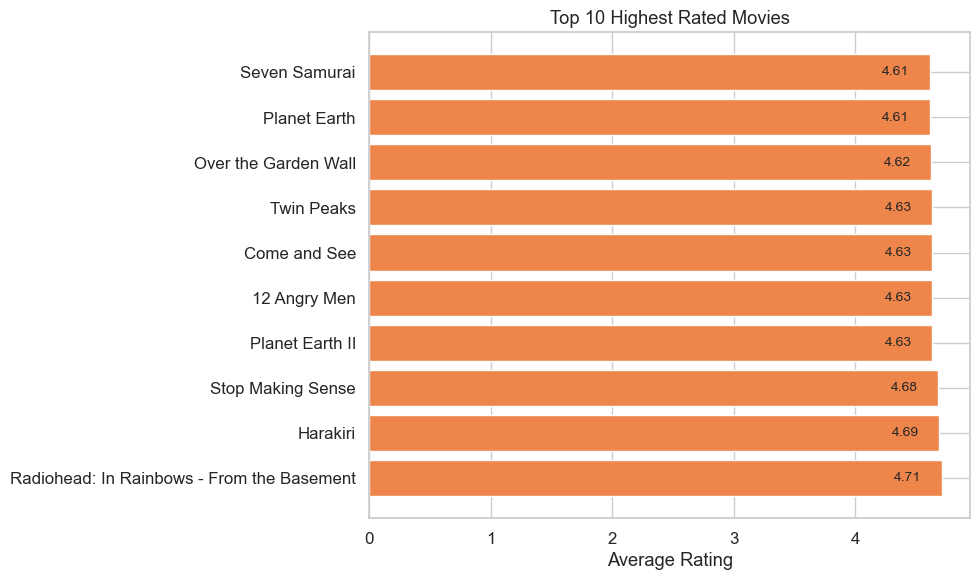

Bottom 10 lowest rated movies:


,Film_title,Average_rating,Total_ratings
8177,365 Days,1.08,142850
7698,Swiped,1.09,23124
3220,The Last Airbender,1.11,224081
4176,Son of the Mask,1.24,53736
2506,Battlefield Earth,1.28,26717
6097,Foodfight!,1.29,16225
4178,Epic Movie,1.29,61638
3812,Fantastic Four,1.34,211714
7892,Artemis Fowl,1.35,43837
1705,Alone in the Dark,1.35,12695


In [18]:
# Filter for movies with at least 20 ratings to avoid noise
min_ratings = 20
filtered_movies = movies[movies['Total_ratings'] >= min_ratings]

# Top 10 highest rated movies (with at least min_ratings)
top_movies = filtered_movies.sort_values('Average_rating', ascending=False).head(10)
# Bottom 10 lowest rated movies (with at least min_ratings)
bottom_movies = filtered_movies.sort_values('Average_rating', ascending=True).head(10)

print("Top 10 highest rated movies:")
display(top_movies[['Film_title', 'Average_rating', 'Total_ratings']])

high_rated = movies.loc[movies['Average_rating']>3].sort_values('Average_rating',ascending=False)

high_r = high_rated[['Film_title', 'Average_rating']].head(10)
plt.figure(figsize=(10,6))
plt.barh(high_r['Film_title'], high_r['Average_rating'])  
bars = plt.barh(high_r['Film_title'], high_r['Average_rating'])

plt.xlabel('Average Rating')
plt.title('Top 10 Highest Rated Movies')
# Add the rating as text at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.39, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("Bottom 10 lowest rated movies:")
display(bottom_movies[['Film_title', 'Average_rating', 'Total_ratings']])


**Insight:**  
The tables above show the most and least liked movies (by average rating) among movies with at least 20 ratings. This helps avoid outliers from movies that have only a handful of ratings.


## Movie Rating Distribution

Let's visualize the distribution of average movie ratings.


C:\Users\arunk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


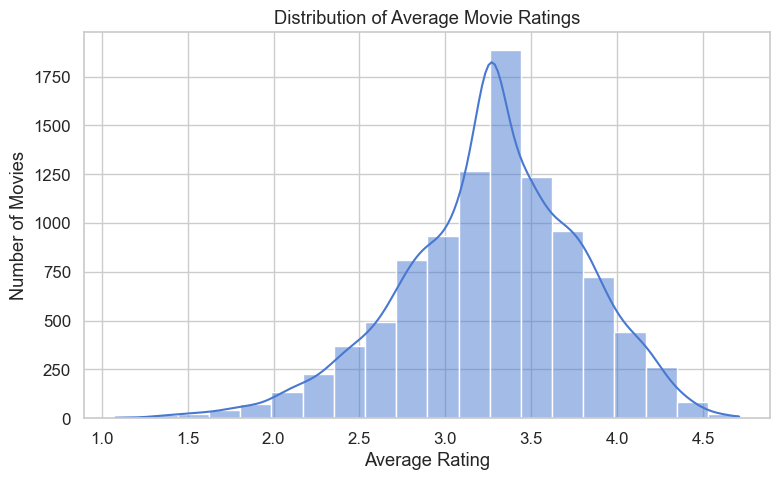

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(movies['Average_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


**Insight:**  
Most movies tend to have average ratings between 2.5 and 4.5, indicating a slight positive bias in user ratings, with a peak around 3.25


## Most Common Movie Genres and most reviewed Movies

Let's see which genres are most common in this dataset.


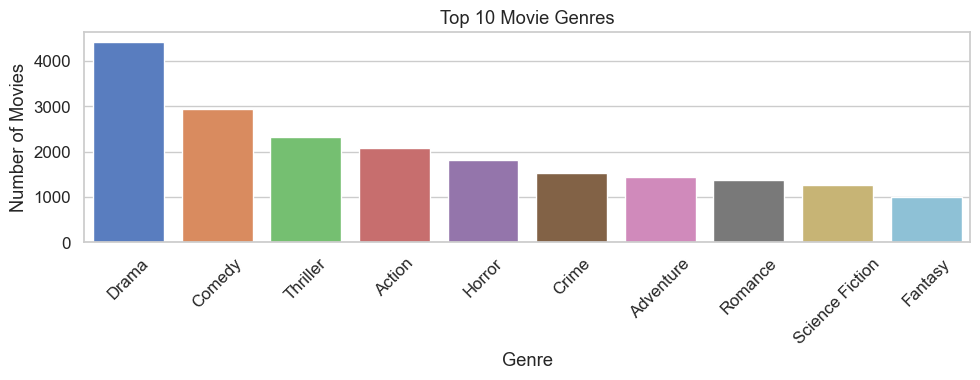

In [24]:
all_genres = [genre for sublist in movies['Genres'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()
top_genres = genre_counts.head(10)

plt.figure(figsize=(10,4))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Movie Genres')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight:**  
The most popular genres are listed above. These likely reflect broader trends in film production and viewer preferences.


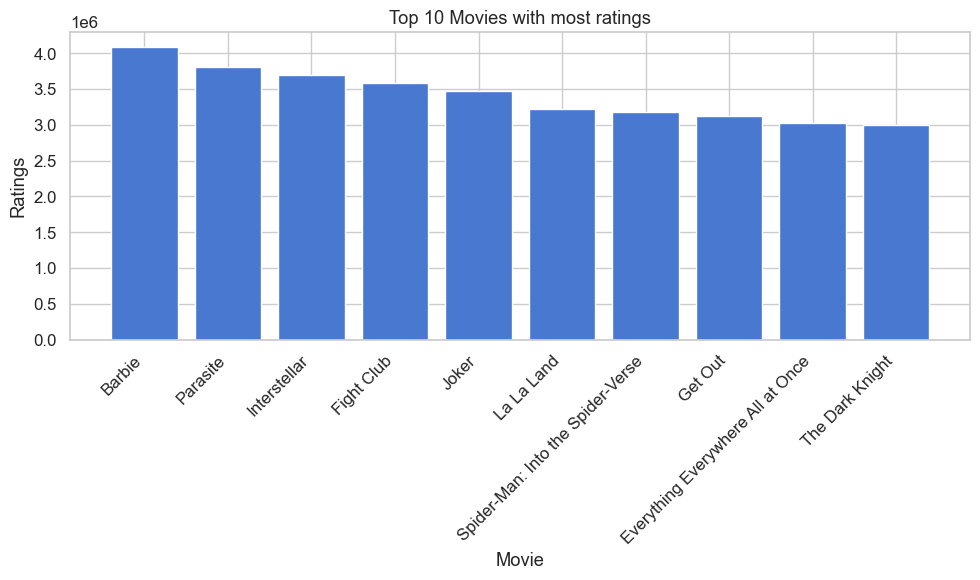

In [26]:
most_rated = movies.sort_values('Total_ratings',ascending=False).head(10)

plt.figure(figsize=(10,6))
bars = plt.bar(most_rated['Film_title'], most_rated['Total_ratings'])

plt.xlabel('Movie')
plt.ylabel('Ratings')
plt.title('Top 10 Movies with most ratings')
plt.xticks(rotation=45, ha='right')   # so you can read it

plt.tight_layout()
plt.show()

## Correlation Analysis

Let's see if there's a relationship between total ratings and average rating.


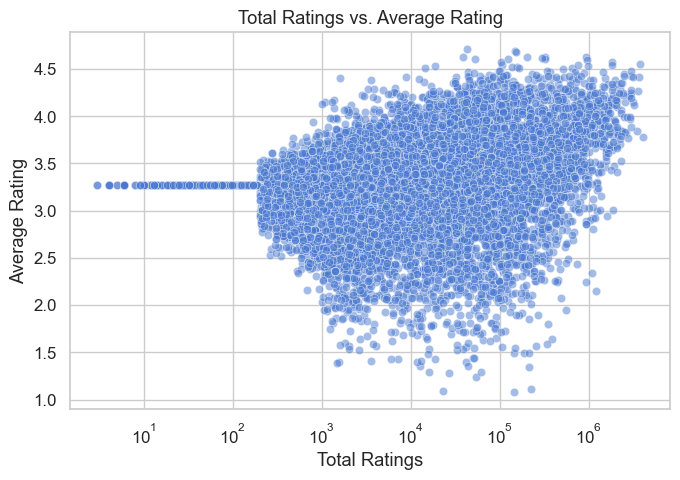

In [28]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=movies, x='Total_ratings', y='Average_rating', alpha=0.5)
plt.title('Total Ratings vs. Average Rating')
plt.xlabel('Total Ratings')
plt.ylabel('Average Rating')
plt.xscale('log')  # If highly skewed
plt.tight_layout()
plt.show()


**Insight:**  
Movies with very few ratings often have more extreme (high or low) average ratings. Popular movies (lots of ratings) tend to have more moderate average ratings.


## Language Duration Analysis

If the dataset contains language or year, analyze the distribution and trends.


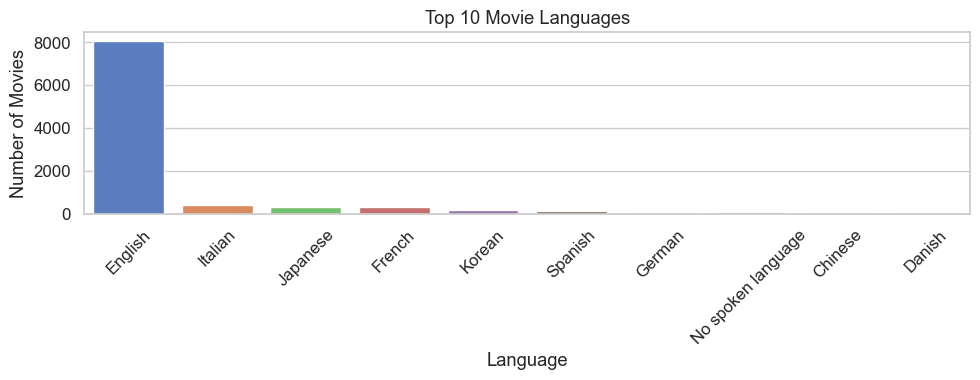

In [31]:
if 'Original_language' in movies.columns:
    plt.figure(figsize=(10,4))
    lang_counts = movies['Original_language'].value_counts().head(10)
    sns.barplot(x=lang_counts.index, y=lang_counts.values)
    plt.title('Top 10 Movie Languages')
    plt.ylabel('Number of Movies')
    plt.xlabel('Language')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




**Insight:**  
This plot helps reveal production trends over time and the most represented languages, with english being the most common in this dataset


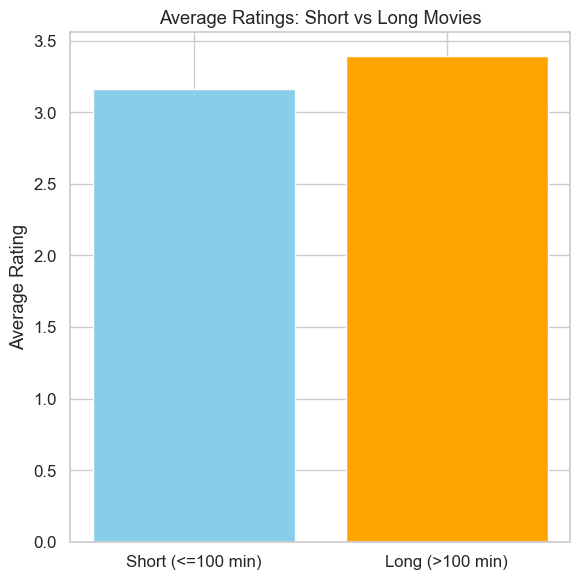

In [33]:
Short_movie = movies.loc[movies['Runtime']<=100]
Long_movie = movies.loc[movies['Runtime']>100]

short_rating = Short_movie['Average_rating'].sum() / Short_movie['Average_rating'].count()

long_rating = Long_movie['Average_rating'].sum() / Long_movie['Average_rating'].count()


labels = ['Short (<=100 min)', 'Long (>100 min)']
avg_ratings = [short_rating, long_rating]
plt.figure(figsize=(6,6))
bars = plt.bar(labels, avg_ratings, color=['skyblue', 'orange']) # 2 bar with the x-value and y 
plt.ylabel('Average Rating')
plt.title('Average Ratings: Short vs Long Movies')
plt.tight_layout()
plt.show()

### Insight
With the average duration being 103 minutes, rounded down to 100, movies with a duration over 100 minutes tend to be higher rated 

## Conclusion

We explored the Letterboxd movie dataset, analyzing key trends in ratings, genres, and more.  
This EDA provides a foundation for deeper analysis, such as building a recommendation system (to be continued in the next notebook section).


## Recommendation System: Content-Based Approach

Because our dataset contains only movie information and average ratings (no user-level data), we use a content-based recommendation system. This system finds movies with similar genres, directors, or other features to a movie the user already likes.


## 🤖 Content-Based Movie Recommendation

Recommend similar movies using feature-based similarity (TF-IDF and cosine similarity).  
This approach is classic in industry when you have item features but not per-user history.


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

for col in movies.columns:
     movies[col] = movies[col].fillna('').astype(str).str.lower().str.strip()


movies['Features'] =  (
    movies['Genres'] + ' ' +
    movies['Director'] + ' ' +
    movies['Film_title'] + ' ' +
    movies['Description'] + ' ' +
    movies['Studios'] + ' ' +
    movies['Description']+ ' ' +
    movies['Original_language']
)

# Step 2:` Vectorize with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english') # Assigning a numerical score to each word
tfidf_matrix = vectorizer.fit_transform(movies['Features']) # ENTIRE column 
print(movies['Features'].head(5))


0    ['horror', 'drama'] eckhart schmidt the fan th...
1    ['adventure', 'science fiction', 'action'] geo...
2    ['horror'] dario argento suspiria an american ...
3    ['drama', 'comedy', 'romance'] sofia coppola l...
4    ['animation', 'action', 'science fiction'] kat...
Name: Features, dtype: object


In [47]:
def recommend_movies(title, k=5):
    title = title.lower().strip()
    
    matches = movies[movies['Film_title'] == title]
    if matches.empty:
        print(f"Movie '{title}' not found. Try another title or check spelling.")
        return None
    idx = matches.index[0]
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten() # no explicit loop needed
   
    sim_series = pd.Series(sim_scores)
    sim_series = sim_series.drop(idx)
    top_indices = sim_series.nlargest(k).index.tolist() # convert so you can use pandas to sort and get row indices as a python list
    
    
    recommendations = movies.iloc[top_indices][['Film_title', 'Genres', 'Director']]
    recommendations['Similarity'] = sim_scores[top_indices]
    return recommendations


    


In [48]:
user_input_title = "Mad Max: Fury Road"   # Change to any movie title in your dataset
results = recommend_movies(user_input_title, k=5)

if results is not None:
    print(f"\nTop 5 movies similar to '{user_input_title.title()}':\n")
    print(results)


Top 5 movies similar to 'Mad Max: Fury Road':

                      Film_title  \
117             star trek beyond   
2132                       rakka   
6655     black mirror: metalhead   
4338  mad max beyond thunderdome   
8413           original gangstas   

                                                 Genres  \
117          ['action', 'science fiction', 'adventure']   
2132            ['science fiction', 'action', 'horror']   
6655  ['science fiction', 'tv movie', 'thriller', 'm...   
4338         ['adventure', 'science fiction', 'action']   
8413           ['thriller', 'drama', 'crime', 'action']   

                           Director  Similarity  
117                      justin lin    0.152087  
2132                 neill blomkamp    0.144416  
6655                    david slade    0.136123  
4338  george ogilvie, george miller    0.133287  
8413                    larry cohen    0.128991  


## 🧠 Movie Genre Prediction from Plot Description
Imagine you have thousands of movies but, for some of them, the genre label is missing, uncertain, or inconsistent. Wouldn’t it be useful if you could “read” the plot description and automatically predict the most likely genre? This is exactly what we accomplish here.

By transforming each movie’s plot summary into a set of numerical features using TF-IDF vectorization, we train a machine learning model (Random Forest Classifier) to recognize language patterns that are typical for each genre. For example, descriptions about "space battles" and "aliens" are often Sci-Fi, while "love stories" and "relationships" point to Romance or Drama.

This approach demonstrates a practical use of NLP and supervised machine learning: automating content classification. It’s the kind of technology streaming platforms use to improve cataloging and discoverability, and it shows how data science can extract structured knowledge from raw text.



In [49]:
def force_to_list(x):
    # Handles strings like "[Action, Drama]", "Action, Drama", or actual lists
    if isinstance(x, list):
        return x
    return [g.strip().strip("'").strip('"') for g in str(x).replace('[','').replace(']','').split(',') if g.strip()]

def flatten_genres(lst):
    # Return the first genre as a string, lowercased. If empty, return 'unknown'
    return lst[0].lower() if lst and len(lst[0].strip()) > 0 else 'unknown'

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


df = movies.copy()  
df['Description'] = df['Description'].fillna('').astype(str)

df['Genres'] = df['Genres'].fillna('').apply(force_to_list)
df['main_genre'] = df['Genres'].apply(flatten_genres)


from sklearn.preprocessing import LabelEncoder
encode_feature = LabelEncoder()
df['main_genre_encoded'] = encode_feature.fit_transform(df['main_genre'])  # target features need to be numerical values for prediction


vectorizer = TfidfVectorizer(stop_words='english', max_features=1500)
X = vectorizer.fit_transform(df['Description'])

y = df['main_genre_encoded']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

genre_pred_model = RandomForestClassifier(n_estimators=100, random_state=42) # for bext way to reduce variance
genre_pred_model.fit(X_train, y_train)

y_pred = genre_pred_model.predict(X_test)

#print(classification_report(y_test, y_pred,  labels=range(len(le_genre.classes_)),target_names=le_genre.classes_))



sample_desc = "Friends go camping"
sample_tfidf = vectorizer.transform([sample_desc])


probs = genre_pred_model.predict_proba(sample_tfidf)[0]


top_n = 3
top_indices = probs.argsort()[-top_n:][::-1]  


for idx in top_indices:
    genre = encode_feature.inverse_transform([idx])[0]
    prob = probs[idx]
    print(f"Predicted genre: {genre.title()}   Probability: {prob:.2f}")


Predicted genre: Comedy   Probability: 0.56
Predicted genre: Drama   Probability: 0.14
Predicted genre: Romance   Probability: 0.09



---

## ✅ Project Summary

- **EDA** revealed insights into genre popularity, rating distributions, and key patterns.
- **Content-based recommendation** used TF-IDF and cosine similarity to suggest similar movies.
- **Genre prediction** demonstrated supervised ML and NLP for automated content tagging.

**Skills demonstrated:** Python, pandas, scikit-learn, feature engineering, NLP, supervised learning, model evaluation, and project storytelling.
